## TP 03: Histogramas de Luminancia

In [1]:
from skimage import data, io, filters

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

In [3]:
import seaborn as sns

In [4]:
pwd

'/Users/palazzom/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes'

# Importamos las imagenes a utilizar

In [5]:
img1 = io.imread('/Users/palazzom/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/planetario.jpg')
img2 = io.imread('/Users/palazzom/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/totem.jpg')

In [6]:
import matplotlib.image as mpimg

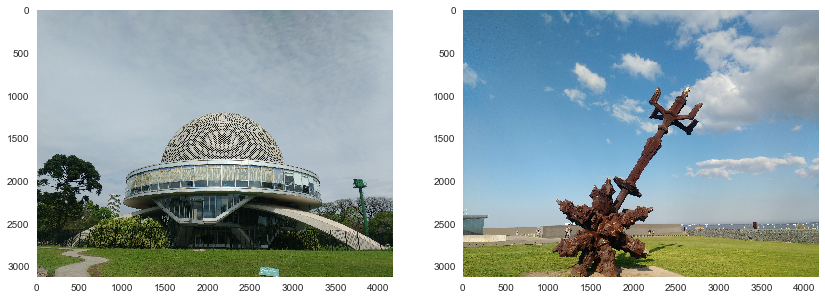

In [7]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(14, 8)
axarr[0].imshow(img1)
axarr[1].imshow(img2)
axarr[0].grid(False)
axarr[1].grid(False)
plt.show()

In [8]:
# Normalizamos las imagenes entre 0 y 1.
imgnorm1 = img1.astype(float) / 255
imgnorm2 = img2.astype(float) / 255

# Pasamos imagenes del espacio RGB a YIQ

In [9]:
to_yiq = np.array([[0.299,0.587, 0.114], 
                   [0.595716, -0.274453, -0.321263], 
                   [0.211456, -0.522591, 0.311135]])

In [10]:
to_rgb = np.array([[1  ,    0.9663, 0.621], 
                   [1  ,  -0.2721, -0.6474], 
                   [1  ,  -1.107, 1.7046]])

In [11]:
# Matrices para las imagenes originales
yiq1 = np.zeros((np.shape(imgnorm1)[0],np.shape(imgnorm1)[1],np.shape(imgnorm1)[2]))
yiq2 = np.zeros((np.shape(imgnorm2)[0],np.shape(imgnorm2)[1],np.shape(imgnorm2)[2]))

yiq1 = np.matmul(imgnorm1,to_yiq.T)
yiq2 = np.matmul(imgnorm2,to_yiq.T)

In [12]:
# Aseguramos que las imagenes en YIQ esten dentro de los rangos aceptables.

yiq1[yiq1[:,:,0] >1,0] = 1
yiq1[yiq1[:,:,1] > 0.5957,1] = 0.5957
yiq1[yiq1[:,:,1] < -0.5957,1] = -0.5957
yiq1[yiq1[:,:,2] > 0.5226,2] = 0.5226
yiq1[yiq1[:,:,2] < -0.5226,2] = -0.5226

yiq2[yiq2[:,:,0] >1,0] = 1
yiq2[yiq2[:,:,1] >0.5957,1] = 0.5957
yiq2[yiq2[:,:,1] <-0.5957,1] = -0.5957
yiq2[yiq2[:,:,2] >0.5226,2] = 0.5226
yiq2[yiq2[:,:,2] <-0.5226,2] = -0.5226

# Histograma de Luminancia sin filtros con distintos contadores

### Probamos con la imagen Planetario
Para cada una de las imagenes se muestra el histograma de luminancia con 10, 20 y 50 contadores.

In [13]:
contadores = [10,20,50]

/Users/palazzom/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


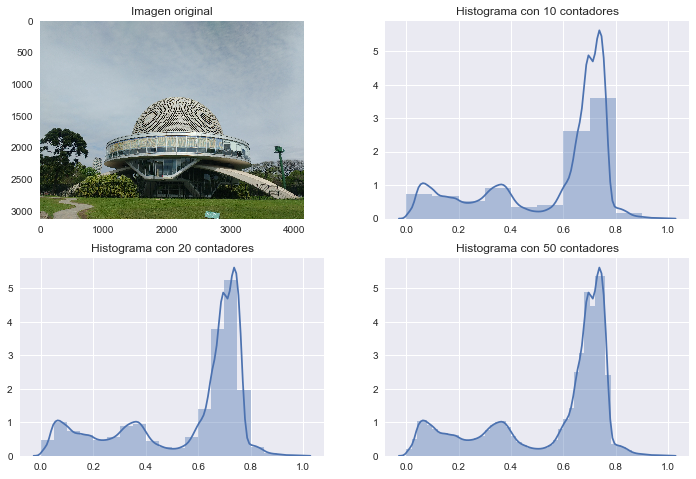

In [14]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(12,8)
axarr[0,0].imshow(img1)
axarr[0,0].grid(False)
axarr[0,0].set_title("Imagen original")
sns.distplot(yiq1[:,:,0].ravel(), bins= contadores[0], ax = axarr[0,1])
axarr[0,1].set_title("Histograma con 10 contadores")
sns.distplot(yiq1[:,:,0].ravel(), bins= contadores[1], ax = axarr[1,0])
axarr[1,0].set_title("Histograma con 20 contadores")
sns.distplot(yiq1[:,:,0].ravel(), bins= contadores[2], ax = axarr[1,1])
axarr[1,1].set_title("Histograma con 50 contadores")
plt.show()

### Probamos con la imagen Totem

/Users/palazzom/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


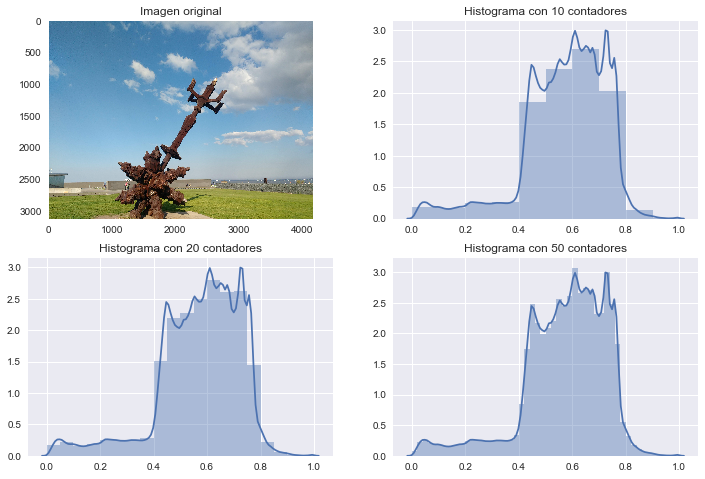

In [15]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(12,8)
axarr[0,0].imshow(img2)
axarr[0,0].grid(False)
axarr[0,0].set_title("Imagen original")
sns.distplot(yiq2[:,:,0].ravel(), bins= 10, ax = axarr[0,1])
axarr[0,1].set_title("Histograma con 10 contadores")
sns.distplot(yiq2[:,:,0].ravel(), bins= 20, ax = axarr[1,0])
axarr[1,0].set_title("Histograma con 20 contadores")
sns.distplot(yiq2[:,:,0].ravel(), bins= 50, ax = axarr[1,1])
axarr[1,1].set_title("Histograma con 50 contadores")
plt.show()

# Modificación del Histograma de Luminancia con Filtro Raíz

Aplicamos el filtro raiz en la luminancia de las 2 figuras

In [16]:
yiq1_sqrt = np.matmul(imgnorm1,to_yiq.T)
yiq2_sqrt = np.matmul(imgnorm2,to_yiq.T)

yiq1_sqrt[:,:,0] = np.sqrt(yiq1[:,:,0])
yiq2_sqrt[:,:,0] = np.sqrt(yiq2[:,:,0])

Pasamos del espacio YIQ a RGB las imagenes modificadas por el filtro.

In [17]:
img1_sqrt = np.zeros((np.shape(img1)[0],np.shape(img1)[1],np.shape(img1)[2]))
img1_sqrt = np.matmul(yiq1_sqrt,to_rgb.T)
img1_sqrt[img1_sqrt >1] = 1
img1_sqrt[img1_sqrt <0] = 0


img2_sqrt = np.zeros((np.shape(img1)[0],np.shape(img2)[1],np.shape(img2)[2]))
img2_sqrt = np.matmul(yiq2_sqrt,to_rgb.T)
img2_sqrt[img2_sqrt >1] = 1
img2_sqrt[img2_sqrt <0] = 0

Imprimimos las imagenes originales y sus correspondientes imagenes e histogramas modificados.

/Users/palazzom/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


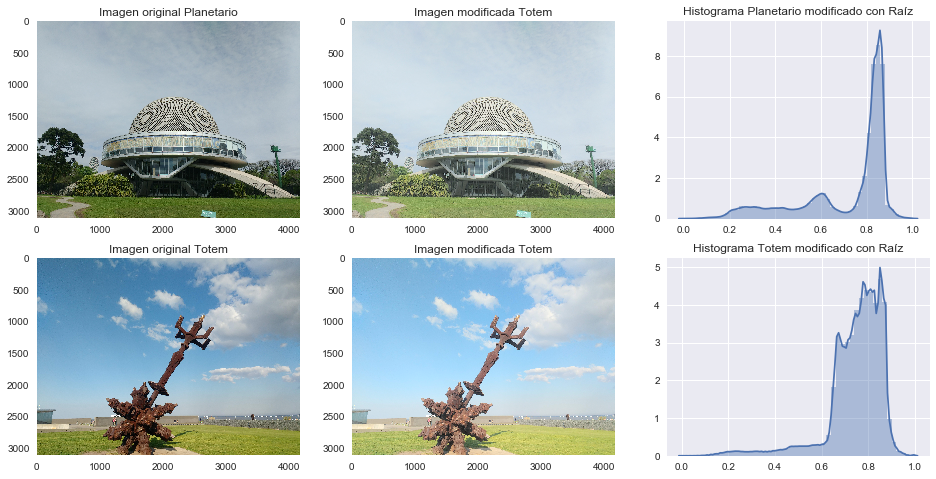

In [18]:
f, axarr = plt.subplots(2,3)
f.set_size_inches(16,8)
axarr[0,0].imshow(img1)
axarr[0,0].grid(False)
axarr[0,0].set_title("Imagen original Planetario")

axarr[0,1].imshow(img1_sqrt)
axarr[0,1].grid(False)
axarr[0,1].set_title("Imagen modificada Totem")

axarr[1,0].imshow(img2)
axarr[1,0].grid(False)
axarr[1,0].set_title("Imagen original Totem")

axarr[1,1].imshow(img2_sqrt)
axarr[1,1].grid(False)
axarr[1,1].set_title("Imagen modificada Totem")

sns.distplot(yiq1_sqrt[:,:,0].ravel(), bins= 50, ax = axarr[0,2])
axarr[0,2].set_title("Histograma Planetario modificado con Raíz")
sns.distplot(yiq2_sqrt[:,:,0].ravel(), bins= 50, ax = axarr[1,2])
axarr[1,2].set_title("Histograma Totem modificado con Raíz")
plt.show()

# Modificación del Histograma de Luminancia con Filtro Cuadrado

Aplicamos el filtro cuadrado en la luminancia de las 2 figuras

In [19]:
yiq1_square = np.matmul(imgnorm1,to_yiq.T)
yiq2_square = np.matmul(imgnorm2,to_yiq.T)

yiq1_square[:,:,0] = np.square(yiq1[:,:,0])
yiq2_square[:,:,0] = np.square(yiq2[:,:,0])

Pasamos del espacio YIQ a RGB las imagenes modificadas por el filtro.

In [20]:
img1_square = np.zeros((np.shape(img1)[0],np.shape(img1)[1],np.shape(img1)[2]))
img1_square = np.matmul(yiq1_square,to_rgb.T)
img1_square[img1_square >1] = 1
img1_square[img1_square <0] = 0

img2_square = np.zeros((np.shape(img1)[0],np.shape(img2)[1],np.shape(img2)[2]))
img2_square = np.matmul(yiq2_square,to_rgb.T)
img2_square[img2_square >1] = 1
img2_square[img2_square <0] = 0

Imprimimos las imagenes originales y sus correspondientes imagenes e histogramas modificados.

/Users/palazzom/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


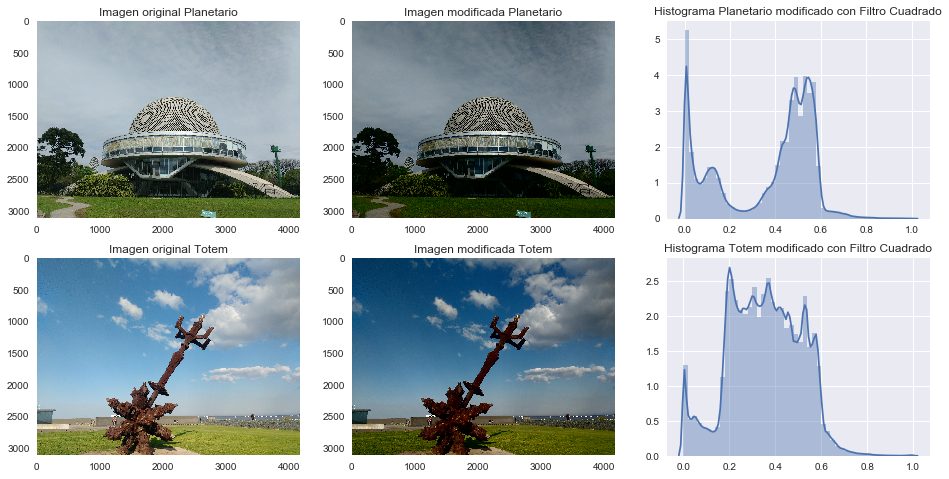

In [21]:
f, axarr = plt.subplots(2,3)
f.set_size_inches(16,8)
axarr[0,0].imshow(img1)
axarr[0,0].grid(False)
axarr[0,0].set_title("Imagen original Planetario")

axarr[0,1].imshow(img1_square)
axarr[0,1].grid(False)
axarr[0,1].set_title("Imagen modificada Planetario")

axarr[1,0].imshow(img2)
axarr[1,0].grid(False)
axarr[1,0].set_title("Imagen original Totem")

axarr[1,1].imshow(img2_square)
axarr[1,1].grid(False)
axarr[1,1].set_title("Imagen modificada Totem")

sns.distplot(yiq1_square[:,:,0].ravel(), bins= 50, ax = axarr[0,2])
axarr[0,2].set_title("Histograma Planetario modificado con Filtro Cuadrado")
sns.distplot(yiq2_square[:,:,0].ravel(), bins= 50, ax = axarr[1,2])
axarr[1,2].set_title("Histograma Totem modificado con Filtro Cuadrado")
plt.show()

# Modificación del Histograma de Luminancia con Filtro Lineal a Trozos

In [22]:
yiq1_lintro = yiq1.copy()
yiq2_lintro = yiq2.copy()

Definimos los valores de Luminancia minima y maxima para el filtro en cada imágen.

In [23]:
ymin1 = 0.1
ymax1 = 0.9
m1 = 1/(ymax1-ymin1)

ymin2 = 0.1
ymax2 = 0.8
m2 = 1/(ymax2-ymin2)

Filtramos las imágenes con el filtro diseñado Lineal a Trozos en base a los parámetros seleccionados (Ymin, Ymax).

In [24]:
for i in range(0,np.shape(yiq1_lintro)[0]):
    for j in range(0,np.shape(yiq1_lintro)[1]):
        if yiq1[i,j,0]> ymax1:
            yiq1_lintro[i,j,0] = 1
        if yiq1[i,j,0]< ymin1:
            yiq1_lintro[i,j,0] = 0
        if (yiq1[i,j,0]> ymin1) & (yiq1[i,j,0]< ymax1):
            yiq1_lintro[i,j,0]= (yiq1[i,j,0]-ymin1)*m1
        
        if yiq2[i,j,0]> ymax2:
            yiq2_lintro[i,j,0] = 1
        if yiq2[i,j,0]< ymin2:
            yiq2_lintro[i,j,0] = 0  
        if (yiq2[i,j,0]> ymin2) & (yiq2[i,j,0]< ymax2):
            yiq2_lintro[i,j,0]= (yiq2[i,j,0]-ymin2)*m2

Pasamos del espacio YIQ a RGB las imagenes modificadas por el filtro.

In [25]:
img1_lintro = np.zeros((np.shape(img1)[0],np.shape(img1)[1],np.shape(img1)[2]))
img1_lintro = np.matmul(yiq1_lintro,to_rgb.T)
img1_lintro[img1_lintro >1] = 1
img1_lintro[img1_lintro <0] = 0

img2_lintro = np.zeros((np.shape(img1)[0],np.shape(img2)[1],np.shape(img2)[2]))
img2_lintro = np.matmul(yiq2_lintro,to_rgb.T)
img2_lintro[img2_lintro >1] = 1
img2_lintro[img2_lintro <0] = 0

Imprimimos las imagenes originales y sus correspondientes imagenes e histogramas modificados.

/Users/palazzom/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


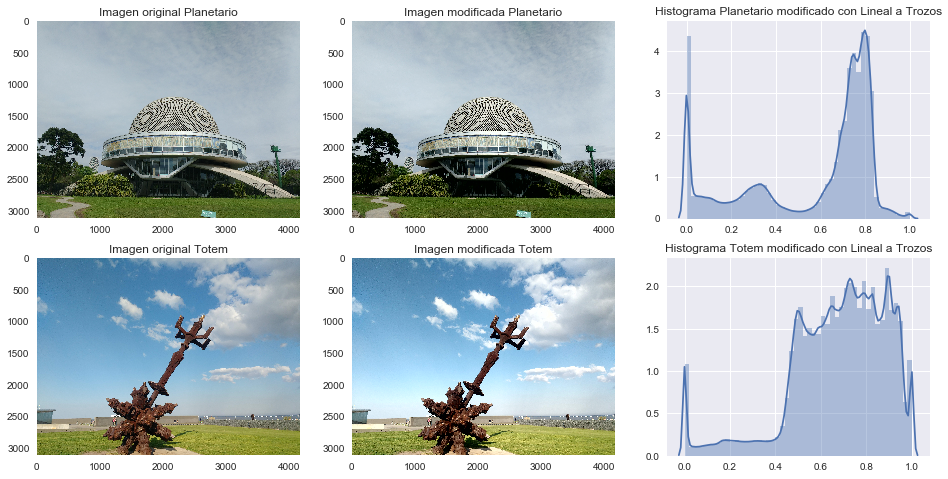

In [26]:
f, axarr = plt.subplots(2,3)
f.set_size_inches(16,8)
axarr[0,0].imshow(img1)
axarr[0,0].grid(False)
axarr[0,0].set_title("Imagen original Planetario")

axarr[0,1].imshow(img1_lintro)
axarr[0,1].grid(False)
axarr[0,1].set_title("Imagen modificada Planetario")

axarr[1,0].imshow(img2)
axarr[1,0].grid(False)
axarr[1,0].set_title("Imagen original Totem")

axarr[1,1].imshow(img2_lintro)
axarr[1,1].grid(False)
axarr[1,1].set_title("Imagen modificada Totem")

sns.distplot(yiq1_lintro[:,:,0].ravel(), bins= 50, ax = axarr[0,2])
axarr[0,2].set_title("Histograma Planetario modificado con Lineal a Trozos")
sns.distplot(yiq2_lintro[:,:,0].ravel(), bins= 50, ax = axarr[1,2])
axarr[1,2].set_title("Histograma Totem modificado con Lineal a Trozos")
plt.show()